In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score


In [2]:
df = pd.read_excel('C:\\Users\\pc\\Desktop\\movie_review_analysis\\Rotten_Tomatoes_Movies3.xls\\r.xls',engine='xlrd')

In [3]:
df.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0


In [4]:
df.shape

(16638, 16)

In [5]:
df.isnull()


,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16633,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
16634,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
16635,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False
16636,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.columns

Index(['movie_title', 'movie_info', 'critics_consensus', 'rating', 'genre',
       'directors', 'writers', 'cast', 'in_theaters_date', 'on_streaming_date',
       'runtime_in_minutes', 'studio_name', 'tomatometer_status',
       'tomatometer_rating', 'tomatometer_count', 'audience_rating'],
      dtype='object')

In [7]:
df['tomatometer_rating']

0         49
1         86
2         68
3        100
4         89
        ... 
16633     56
16634     97
16635     78
16636     95
16637     57
Name: tomatometer_rating, Length: 16638, dtype: int64

In [8]:
df['tomatometer_rating'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
16633    False
16634    False
16635    False
16636    False
16637    False
Name: tomatometer_rating, Length: 16638, dtype: bool

In [9]:
df['rating']

0        PG
1         R
2         R
3        NR
4         G
         ..
16633     R
16634    PG
16635    NR
16636    PG
16637    PG
Name: rating, Length: 16638, dtype: object

In [10]:
df['genre']

0        Action & Adventure, Comedy, Drama, Science Fic...
1                                                   Comedy
2                                          Comedy, Romance
3                                          Classics, Drama
4                 Action & Adventure, Drama, Kids & Family
                               ...                        
16633                     Drama, Musical & Performing Arts
16634                Action & Adventure, Animation, Comedy
16635    Action & Adventure, Art House & International,...
16636                                      Classics, Drama
16637    Action & Adventure, Art House & International,...
Name: genre, Length: 16638, dtype: object

In [11]:
df['audience_rating']


0        53.0
1        64.0
2        53.0
3        97.0
4        74.0
         ... 
16633    74.0
16634    92.0
16635    87.0
16636    91.0
16637    62.0
Name: audience_rating, Length: 16638, dtype: float64

In [12]:
df['audience_rating'].isnull()
df['audience_rating'].isnull().sum()

252

In [13]:
df['critics_consensus']

0        Though it may seem like just another Harry Pot...
1        Nicole Holofcener's newest might seem slight i...
2                                                      NaN
3        Sidney Lumet's feature debut is a superbly wri...
4        One of Disney's finest live-action adventures,...
                               ...                        
16633                                                  NaN
16634    The brilliantly well-rounded Zootopia offers a...
16635                                                  NaN
16636                                                  NaN
16637                                                  NaN
Name: critics_consensus, Length: 16638, dtype: object

In [14]:
df['critics_consensus'].isnull()

0        False
1        False
2         True
3        False
4        False
         ...  
16633     True
16634    False
16635     True
16636     True
16637     True
Name: critics_consensus, Length: 16638, dtype: bool

In [15]:
df.isnull()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16633,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
16634,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
16635,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False
16636,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
df1=df.dropna().reset_index(drop=True)

In [17]:
df1.describe

<bound method NDFrame.describe of                                             movie_title  \
0     Percy Jackson & the Olympians: The Lightning T...   
1                                           Please Give   
2                       12 Angry Men (Twelve Angry Men)   
3                          20,000 Leagues Under The Sea   
4                                           10,000 B.C.   
...                                                 ...   
7605                                          Zookeeper   
7606                                          Zoolander   
7607                                        Zoolander 2   
7608                                               Zoom   
7609                                           Zootopia   

                                             movie_info  \
0     A teenager discovers he's the descendant of a ...   
1     Kate has a lot on her mind. There's the ethics...   
2     A Puerto Rican youth is on trial for murder, a...   
3     This 1954 Disne

REMOVED ALL NULL VALUES

In [18]:
df1.isnull().sum()

movie_title           0
movie_info            0
critics_consensus     0
rating                0
genre                 0
directors             0
writers               0
cast                  0
in_theaters_date      0
on_streaming_date     0
runtime_in_minutes    0
studio_name           0
tomatometer_status    0
tomatometer_rating    0
tomatometer_count     0
audience_rating       0
dtype: int64

CHECKING FOR OUTLIERS


In [19]:
df['text_length'] = df['critics_consensus'].apply(lambda x: len(str(x)))

In [20]:
lower_threshold = 10 
upper_threshold = 500
df2 = df[(df['text_length'] >= lower_threshold) & (df['text_length'] <= upper_threshold)]
print(df2)

                                             movie_title  \
0      Percy Jackson & the Olympians: The Lightning T...   
1                                            Please Give   
3                        12 Angry Men (Twelve Angry Men)   
4                           20,000 Leagues Under The Sea   
5                                            10,000 B.C.   
...                                                  ...   
16629                                          Zookeeper   
16630                                          Zoolander   
16631                                        Zoolander 2   
16632                                               Zoom   
16634                                           Zootopia   

                                              movie_info  \
0      A teenager discovers he's the descendant of a ...   
1      Kate has a lot on her mind. There's the ethics...   
3      A Puerto Rican youth is on trial for murder, a...   
4      This 1954 Disney version of Jule

There are no outliers

In [21]:
print(df1.columns)


Index(['movie_title', 'movie_info', 'critics_consensus', 'rating', 'genre',
       'directors', 'writers', 'cast', 'in_theaters_date', 'on_streaming_date',
       'runtime_in_minutes', 'studio_name', 'tomatometer_status',
       'tomatometer_rating', 'tomatometer_count', 'audience_rating'],
      dtype='object')


In [22]:
df1.columns = df1.columns.str.strip() 

In [23]:
df1['text_length'] = df1['movie_info'].apply(len)


In [24]:
print(df1[df1['text_length'].apply(lambda x: not isinstance(x, (int, float)))])


Empty DataFrame
Columns: [movie_title, movie_info, critics_consensus, rating, genre, directors, writers, cast, in_theaters_date, on_streaming_date, runtime_in_minutes, studio_name, tomatometer_status, tomatometer_rating, tomatometer_count, audience_rating, text_length]
Index: []


In [25]:
lower_threshold = 5  
upper_threshold = 300
df2 = df[(df['text_length'] >= lower_threshold) & (df['text_length'] <= upper_threshold)]
print(f"Before filtering: {df.shape[0]}")
print(f"After filtering: {df2.shape[0]}")

Before filtering: 16638
After filtering: 8304


In [26]:
df1['audience_rating']

0       53.0
1       64.0
2       97.0
3       74.0
4       37.0
        ... 
7605    41.0
7606    80.0
7607    20.0
7608    33.0
7609    92.0
Name: audience_rating, Length: 7610, dtype: float64

In [27]:
from textblob import TextBlob
if 'critics_consensus' in df1.columns:
    df1['sentiment_score']=df1['critics_consensus'].fillna('').apply(lambda x: TextBlob(x).sentiment.polarity)
else:
    print("critics_consensus do not exist")

In [28]:
print(df1[['critics_consensus', 'sentiment_score']].head())


                                   critics_consensus  sentiment_score
0  Though it may seem like just another Harry Pot...         0.245833
1  Nicole Holofcener's newest might seem slight i...         0.055556
2  Sidney Lumet's feature debut is a superbly wri...         0.491667
3  One of Disney's finest live-action adventures,...         0.322917
4  With attention strictly paid to style instead ...         0.366667


In [29]:
df1['audience_rating'] = np.random.uniform(1, 5, len(df1))

Feature retrieval

In [30]:
features = ['sentiment_score', 'runtime_in_minutes', 'tomatometer_rating']  
X = df1[features]
y = df1['audience_rating']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

MODEL CREATION


In [32]:
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train[['sentiment_score', 'runtime_in_minutes', 'tomatometer_rating']], y_train)


model_xgb = XGBRegressor(random_state=42)
model_xgb.fit(X_train, y_train)


model_nn = MLPRegressor(random_state=42, hidden_layer_sizes=(64, 64))
model_nn.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(64, 64), random_state=42)

In [33]:
y_pred_dt = model_dt.predict(X_test[['sentiment_score', 'runtime_in_minutes', 'tomatometer_rating']])
y_pred_xgb = model_xgb.predict(X_test)
y_pred_nn = model_nn.predict(X_test)
weights = np.abs(X_test['sentiment_score'])  
weights = (weights - weights.min()) / (weights.max() - weights.min())  
y_pred_final = (weights * y_pred_xgb + (1 - weights) * y_pred_dt + 0.5 * y_pred_nn) / (weights + (1 - weights) + 0.5)
mse = mean_squared_error(y_test, y_pred_final)
r2 = r2_score(y_test, y_pred_final)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 1.7272775682387793
R² Score: -0.2924634960850385


ACCURACY SCORE

In [34]:
threshold = 2
correct_predictions = np.abs(y_pred_final - y_test) <= threshold
accuracy = np.mean(correct_predictions) * 100
print(f"Custom Accuracy: {accuracy:.2f}%")


Custom Accuracy: 85.81%


R2,Mean Squared Error & Mean Absolute Error

In [35]:
r2 = r2_score(y_test, y_pred_final)
mse = mean_squared_error(y_test, y_pred_final)
mae = mean_absolute_error(y_test, y_pred_final)
print(f"R² Score: {r2:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")


R² Score: -0.29
Mean Squared Error (MSE): 1.73
Mean Absolute Error (MAE): 1.09


Training MSE, Test MSE, Training R² Score & Test R² Score

In [36]:
model_dt.fit(X_train, y_train)
y_train_pred = model_dt.predict(X_train)
y_test_pred = model_dt.predict(X_test)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Training R² Score: {train_r2}")
print(f"Test R² Score: {test_r2}")


Training MSE: 0.006841132637262975
Test MSE: 2.645725450658206
Training R² Score: 0.9947754946468823
Test R² Score: -0.9797070421782701


Cross-validation scores & Average Cross-validation MSE

In [37]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model_dt, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validation scores: {cv_scores}")
print(f"Average Cross-validation MSE: {-cv_scores.mean()}")


Cross-validation scores: [-2.62752038 -2.6307833  -2.68573325 -2.63010999 -2.71362009]
Average Cross-validation MSE: 2.657553402400411


To show the predicted value according to genre in numbers using audience rating

In [38]:
y_test_pred = model_dt.predict(X_test)
df1_test = df1.iloc[X_test.index]
df1_test['predicted_audience_rating'] = y_test_pred
genre_avg_predictions = df1_test.groupby('genre')['predicted_audience_rating'].mean().reset_index()
genre_avg_predictions = genre_avg_predictions.sort_values(by='predicted_audience_rating', ascending=False)
print(genre_avg_predictions)

                                                 genre  \
10   Action & Adventure, Animation, Kids & Family, ...   
34   Action & Adventure, Classics, Drama, Mystery &...   
100  Animation, Comedy, Musical & Performing Arts, ...   
136  Art House & International, Drama, Horror, Scie...   
101               Animation, Drama, Mystery & Suspense   
..                                                 ...   
218      Documentary, Drama, Musical & Performing Arts   
47   Action & Adventure, Comedy, Drama, Science Fic...   
144                  Art House & International, Horror   
116  Art House & International, Comedy, Drama, Musi...   
129  Art House & International, Documentary, Faith ...   

     predicted_audience_rating  
10                    4.980212  
34                    4.962994  
100                   4.926744  
136                   4.880136  
101                   4.878989  
..                         ...  
218                   1.080529  
47                    1.059293  
144   

C:\Users\pc\AppData\Local\Temp\ipykernel_10580\3121733269.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_test['predicted_audience_rating'] = y_test_pred


To show the predicted value according to genre in numbers using audience rating(visualize)

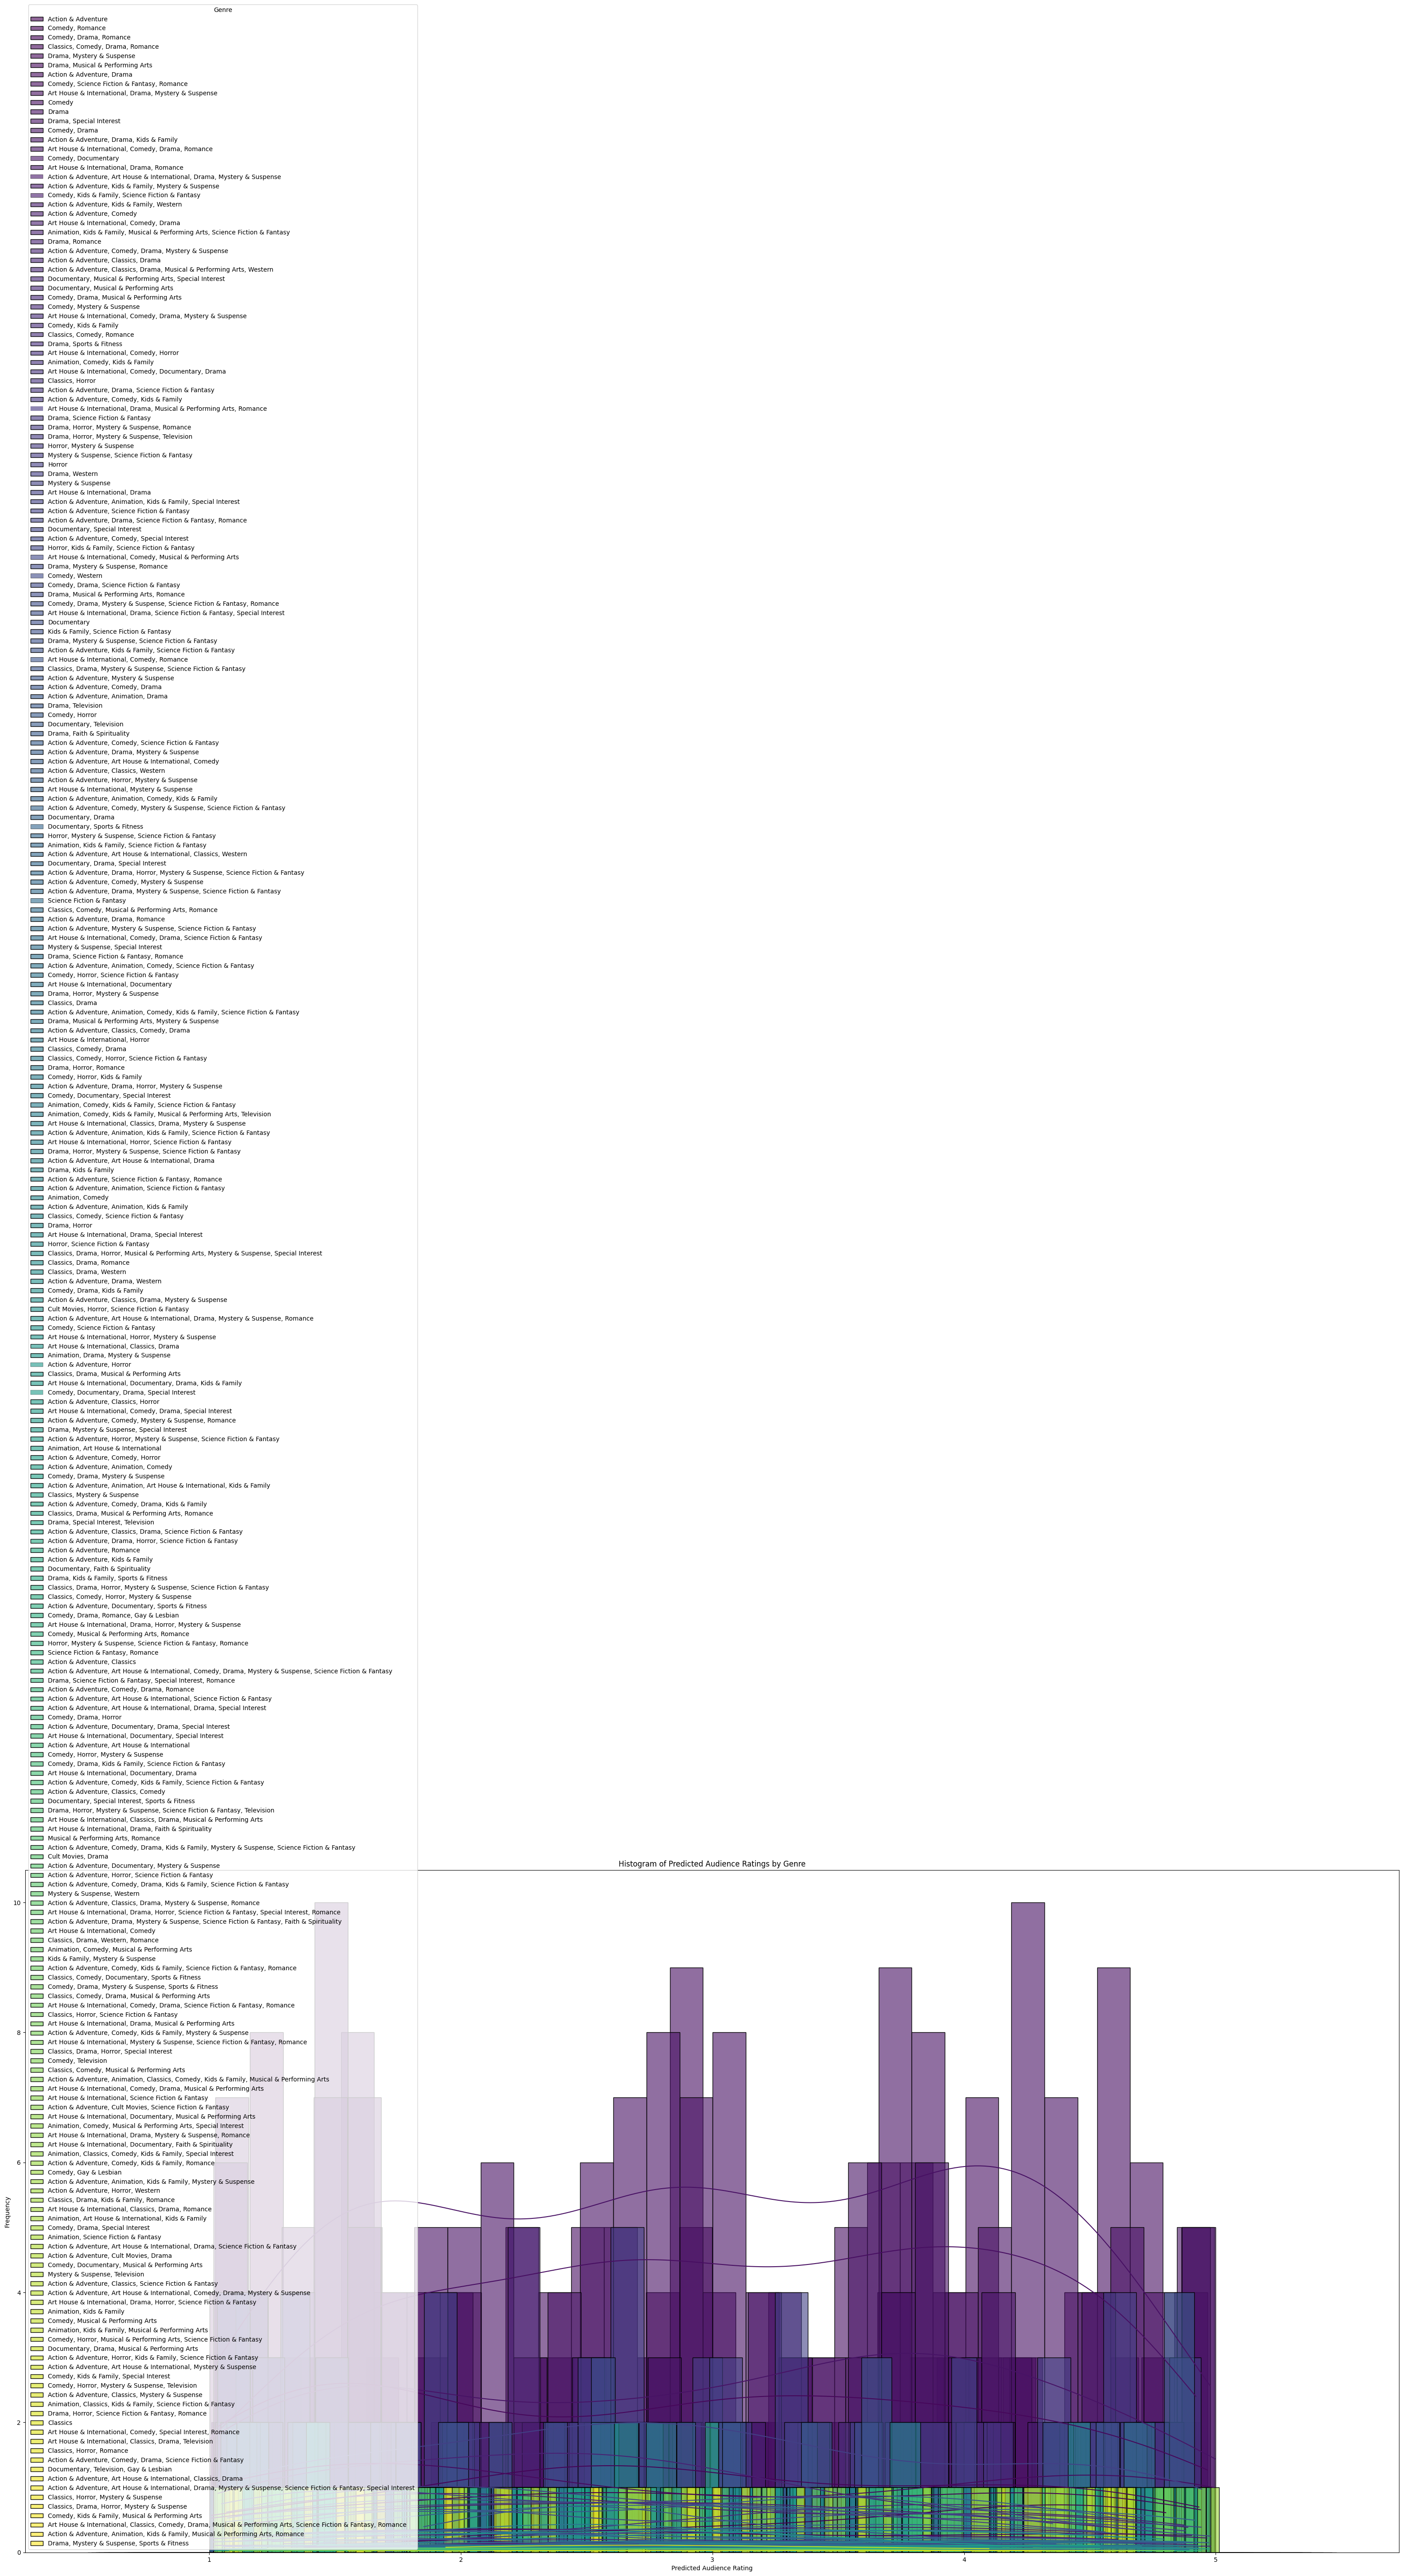

In [39]:
plt.figure(figsize=(40, 20))
colors = sns.color_palette('viridis', n_colors=len(df1_test['genre'].unique()))
for i, genre in enumerate(df1_test['genre'].unique()):
    genre_data = df1_test[df1_test['genre'] == genre]
    sns.histplot(genre_data['predicted_audience_rating'], kde=True, label=genre, bins=30, color=colors[i], alpha=0.6)
plt.title('Histogram of Predicted Audience Ratings by Genre')
plt.xlabel('Predicted Audience Rating')
plt.ylabel('Frequency')
plt.legend(title='Genre')
plt.show()


To show difference b/w audience rating and predicted audience rating

C:\Users\pc\AppData\Local\Temp\ipykernel_10580\2186241101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_test['actual_audience_rating'] = y_test
C:\Users\pc\AppData\Local\Temp\ipykernel_10580\2186241101.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_test['predicted_audience_rating'] = y_test_pred


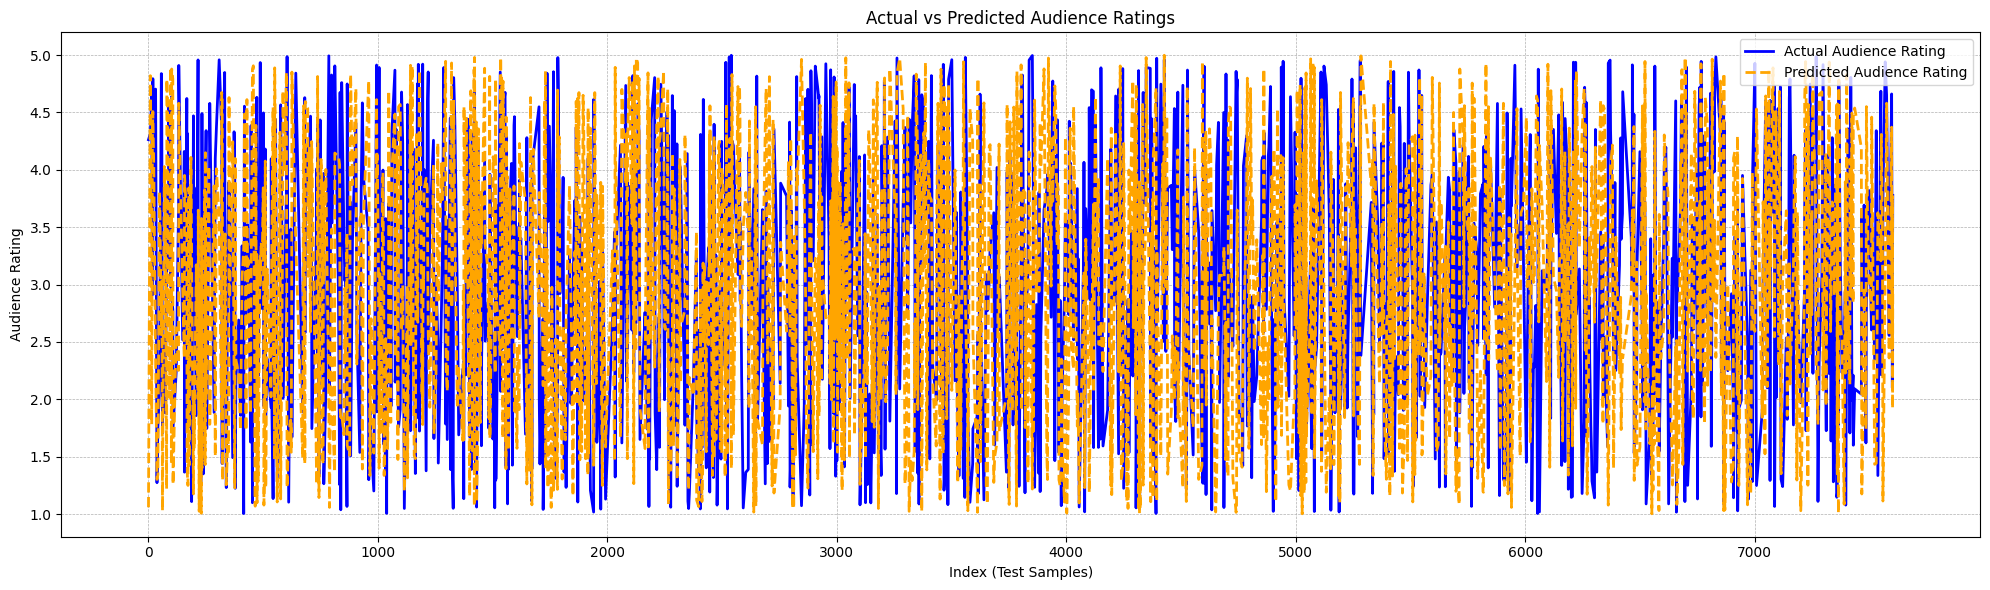

In [40]:
df1_test['actual_audience_rating'] = y_test 
df1_test['predicted_audience_rating'] = y_test_pred 
df1_test_sorted = df1_test.sort_index()  
plt.figure(figsize=(20, 6))
plt.plot(df1_test_sorted.index, df1_test_sorted['actual_audience_rating'], label='Actual Audience Rating', color='blue', linewidth=2)
plt.plot(df1_test_sorted.index, df1_test_sorted['predicted_audience_rating'], label='Predicted Audience Rating', color='orange', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Audience Ratings')
plt.xlabel('Index (Test Samples)')
plt.ylabel('Audience Rating')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()
